# 오피스텔_실거래가

### 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [58]:
officetel21 = pd.read_csv('data/오피스텔(전월세)_실거래가_2021.csv', header=15, encoding='cp949')
officetel22 = pd.read_csv('data/오피스텔(전월세)_실거래가_2022.csv', header=15, encoding='cp949')
officetel23 = pd.read_csv('data/오피스텔(전월세)_실거래가_2023.csv', header=15, encoding='cp949')

C:\Users\emily\AppData\Local\Temp\ipykernel_18900\540466763.py:2: DtypeWarning: Columns (11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  officetel22 = pd.read_csv('data/오피스텔(전월세)_실거래가_2022.csv', header=15, encoding='cp949')


In [14]:
officetel21_deal = pd.read_csv('data/오피스텔(매매)_실거래가_2021.csv', header=15, encoding='cp949')
officetel22_deal = pd.read_csv('data/오피스텔(매매)_실거래가_2022.csv', header=15, encoding='cp949')
officetel23_deal = pd.read_csv('data/오피스텔(매매)_실거래가_2023.csv', header=15, encoding='cp949')

In [4]:
officetel21_deal.nunique()

NO          8982
시군구          236
번지          1533
본번           692
부번           140
단지명         1582
전용면적(㎡)     2427
계약년월          12
계약일           31
거래금액(만원)    1320
층             50
매수             1
매도             1
건축년도          37
도로명         1501
해제사유발생일      193
거래유형           2
중개사소재지       192
dtype: int64

In [5]:
officetel21_deal.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,층,건축년도
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8854.000000
mean,4491.500000,479.636607,14.776664,31.280880,202306.695391,15.600312,8.736139,2011.765191
std,2593.024392,429.430243,41.239851,18.504105,3.474061,8.402901,5.357279,9.048839
min,1.000000,1.000000,0.000000,9.940000,202301.000000,1.000000,1.000000,1987.000000
25%,2246.250000,104.000000,1.000000,20.680000,202304.000000,8.000000,5.000000,2004.000000
50%,4491.500000,369.000000,4.000000,26.821000,202307.000000,15.000000,8.000000,2014.000000
75%,6736.750000,760.000000,12.000000,34.717500,202310.000000,23.000000,12.000000,2019.000000
max,8982.000000,3001.000000,698.000000,483.960000,202312.000000,31.000000,68.000000,2023.000000


In [37]:
officetel21_df = officetel21[officetel21['전월세구분']=='전세']
officetel22_df = officetel22[officetel22['전월세구분']=='전세']
officetel23_df = officetel23[officetel23['전월세구분']=='전세']

In [60]:
officetel21_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31890 entries, 3 to 66716
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NO            31890 non-null  int64         
 1   시군구           31890 non-null  object        
 2   번지            31890 non-null  object        
 3   본번            31890 non-null  int64         
 4   부번            31890 non-null  int64         
 5   단지명           31890 non-null  object        
 6   전월세구분         31890 non-null  object        
 7   전용면적(㎡)       31890 non-null  float64       
 8   계약년월          31890 non-null  datetime64[ns]
 9   계약일           31890 non-null  int64         
 10  보증금(만원)       31890 non-null  int32         
 11  월세금(만원)       31890 non-null  int64         
 12  층             31890 non-null  int64         
 13  건축년도          31289 non-null  float64       
 14  도로명           31890 non-null  object        
 15  계약기간          31890 non-null  object

In [70]:
officetel23_df['보증금(만원)'].info()

<class 'pandas.core.series.Series'>
Int64Index: 27702 entries, 4 to 73552
Series name: 보증금(만원)
Non-Null Count  Dtype 
--------------  ----- 
27702 non-null  object
dtypes: object(1)
memory usage: 432.8+ KB


In [72]:
officetel22_df['보증금(만원)'] = officetel22_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel22_df['보증금(만원)'] = pd.to_numeric(officetel22_df['보증금(만원)']).astype(int)

In [73]:
officetel23_df['보증금(만원)'] = officetel23_df['보증금(만원)'].astype(str).str.replace(',', '', regex=False)
officetel23_df['보증금(만원)'] = pd.to_numeric(officetel23_df['보증금(만원)']).astype(int)

In [62]:
officetel21_deal['거래금액(만원)'] = officetel21_deal['거래금액(만원)'].str.replace(',', '').astype(int)
officetel22_deal['거래금액(만원)'] = officetel22_deal['거래금액(만원)'].str.replace(',', '').astype(int)
officetel23_deal['거래금액(만원)'] = officetel23_deal['거래금액(만원)'].str.replace(',', '').astype(int)

In [39]:
officetel21_df['계약년월'] = pd.to_datetime(officetel21_df['계약년월'].astype(str), format='%Y%m')
officetel22_df['계약년월'] = pd.to_datetime(officetel22_df['계약년월'].astype(str), format='%Y%m')
officetel23_df['계약년월'] = pd.to_datetime(officetel23_df['계약년월'].astype(str), format='%Y%m')

C:\Users\emily\AppData\Local\Temp\ipykernel_18900\3667559628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel21_df['계약년월'] = pd.to_datetime(officetel21_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_18900\3667559628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  officetel22_df['계약년월'] = pd.to_datetime(officetel22_df['계약년월'].astype(str), format='%Y%m')
C:\Users\emily\AppData\Local\Temp\ipykernel_18900\3667559628.py:3: SettingWithCopyWarning: 
A value is t

In [79]:
officetel21_deal['계약년월'] = pd.to_datetime(officetel21_deal['계약년월'].astype(str), format='%Y%m')
officetel22_deal['계약년월'] = pd.to_datetime(officetel22_deal['계약년월'].astype(str), format='%Y%m')
officetel23_deal['계약년월'] = pd.to_datetime(officetel23_deal['계약년월'].astype(str), format='%Y%m')

In [78]:
officetel21_deal

,NO,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,매수,매도,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,1,서울특별시 강서구 마곡동,784-9,784,9,마곡오드카운티2차,17.36,202112,30,13000,10,-,-,2017.0,,-,중개거래,서울 강서구
1,2,서울특별시 서초구 서초동,1679-1,1679,1,코업레지던스/서초동,24.16,202112,30,19000,10,-,-,2004.0,서초대로 360,-,중개거래,서울 서초구
2,3,서울특별시 영등포구 여의도동,13,13,0,여의도파라곤,48.64,202112,30,39500,2,-,-,2005.0,국회대로 800,-,중개거래,서울 영등포구
3,4,서울특별시 양천구 목동,907-10,907,10,현대파리지앙,33.88,202112,30,19800,14,-,-,2004.0,목동서로 57,-,중개거래,서울 양천구
4,5,서울특별시 마포구 도화동,36,36,0,고려아카데미텔,20.25,202112,30,15000,14,-,-,1988.0,마포대로 52,-,중개거래,서울 마포구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19891,19892,서울특별시 강서구 화곡동,1105-3,1105,3,우장산 자하클래식,22.68,202101,1,25800,17,-,-,2020.0,화곡로 319-2,-,-,-
19892,19893,서울특별시 도봉구 창동,623-48,623,48,북한산 드림시티,29.89,202101,1,23300,7,-,-,2020.0,도봉로110마길 42,-,-,-
19893,19894,서울특별시 구로구 오류동,46-1,46,1,이좋은집,34.07,202101,1,13000,15,-,-,2005.0,경인로20나길 30,-,-,-
19894,19895,서울특별시 영등포구 양평동5가,71-2,71,2,브릴리언트 선유,29.00,202101,1,36700,11,-,-,2020.0,양평로22가길 6-1,-,-,-


### 보증금

In [63]:
officetel21_df['보증금(만원)'].describe()

count     31890.000000
mean      21586.508717
std       11835.703148
min         400.000000
25%       15200.000000
50%       19500.000000
75%       25200.000000
max      590625.000000
Name: 보증금(만원), dtype: float64

In [74]:
officetel22_df['보증금(만원)'].describe()

count     33287.000000
mean      22489.961787
std       11808.859451
min         500.000000
25%       16000.000000
50%       20000.000000
75%       26000.000000
max      545580.000000
Name: 보증금(만원), dtype: float64

In [75]:
officetel23_df['보증금(만원)'].describe()

count     27702.000000
mean      22075.638546
std       10189.541282
min        2500.000000
25%       16400.000000
50%       20000.000000
75%       25200.000000
max      210000.000000
Name: 보증금(만원), dtype: float64

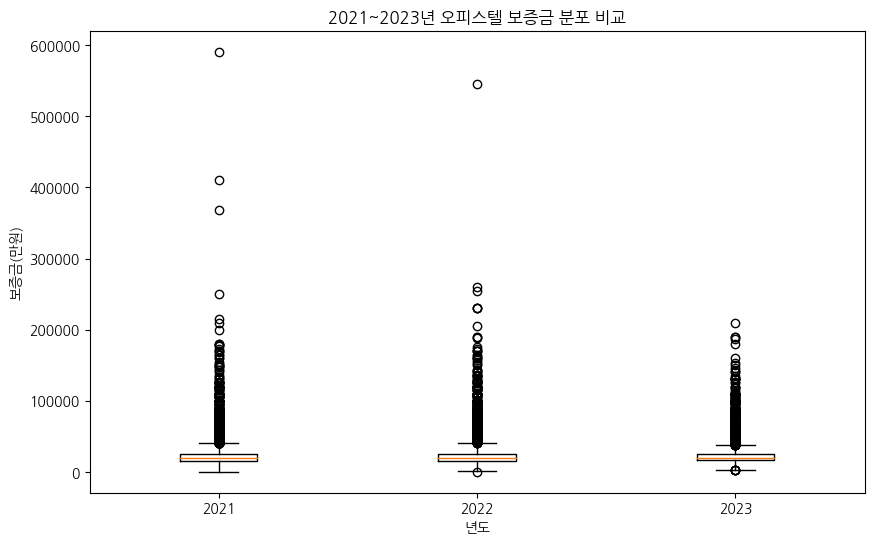

In [88]:
data = [
    officetel21_df['보증금(만원)'],
    officetel22_df['보증금(만원)'],
    officetel23_df['보증금(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2021', '2022', '2023']) 

plt.title('2021~2023년 오피스텔 보증금 분포 비교')
plt.ylabel('보증금(만원)')
plt.xlabel('년도')

plt.show()

### 거래 금액

In [84]:
officetel21_deal['거래금액(만원)'].describe()

count    1.989600e+04
mean     2.726188e+04
std      3.132218e+04
min      4.500000e+03
25%      1.650000e+04
50%      2.300000e+04
75%      2.990000e+04
max      2.450000e+06
Name: 거래금액(만원), dtype: float64

In [85]:
officetel22_deal['거래금액(만원)'].describe()

count      15248.000000
mean       25861.239572
std        30604.963117
min         4100.000000
25%        15800.000000
50%        22000.000000
75%        30000.000000
max      1000000.000000
Name: 거래금액(만원), dtype: float64

In [86]:
officetel23_deal['거래금액(만원)'].describe()

count    8.982000e+03
mean     2.726468e+04
std      4.166513e+04
min      4.200000e+03
25%      1.530000e+04
50%      2.100000e+04
75%      3.080000e+04
max      2.400000e+06
Name: 거래금액(만원), dtype: float64

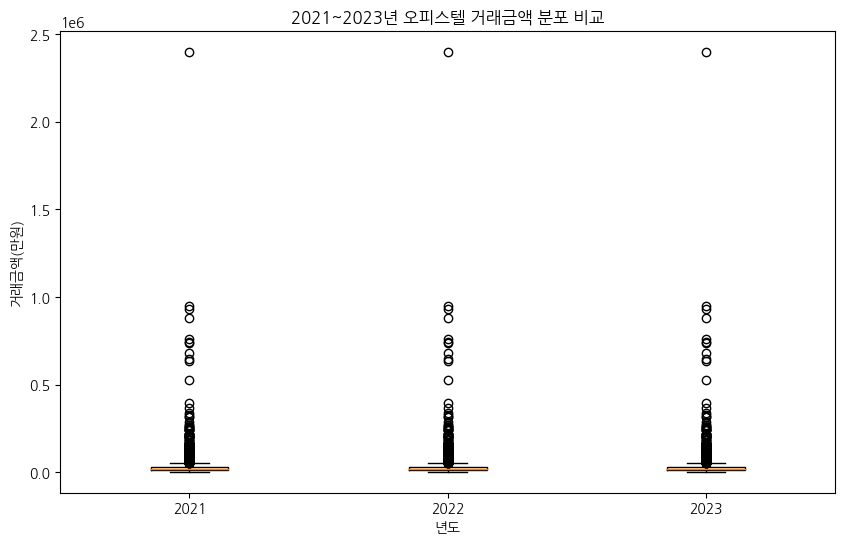

In [87]:
data = [
    officetel23_deal['거래금액(만원)'],
    officetel23_deal['거래금액(만원)'],
    officetel23_deal['거래금액(만원)']
]

plt.figure(figsize=(10,6))
plt.boxplot(data, labels=['2021', '2022', '2023']) 

plt.title('2021~2023년 오피스텔 거래금액 분포 비교')
plt.ylabel('거래금액(만원)')
plt.xlabel('년도')

plt.show()

### 21, 22, 23년 월별 전세 거래 건수

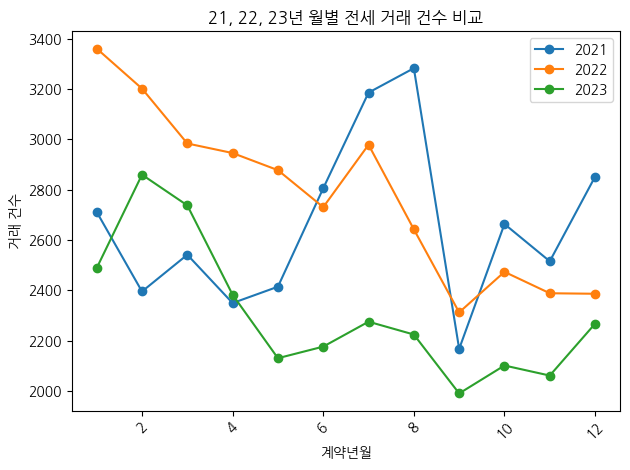

In [83]:
# 21, 22, 23년 월별 거래 건수 계산
counts_21 = officetel21_df['계약년월'].dt.month.value_counts().sort_index()
counts_22 = officetel22_df['계약년월'].dt.month.value_counts().sort_index()
counts_23 = officetel23_df['계약년월'].dt.month.value_counts().sort_index()


df_counts = pd.DataFrame({
    '2021': counts_21,
    '2022': counts_22,
    '2023': counts_23,
})

ax = df_counts.plot(marker='o')
ax.set_xlabel('계약년월')
ax.set_ylabel('거래 건수')
ax.set_title('21, 22, 23년 월별 전세 거래 건수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df_counts

,2021,2022,2023
1,2712,3361,2489
2,2396,3202,2860
3,2542,2984,2738
4,2350,2946,2383
5,2415,2878,2131
6,2806,2731,2177
7,3186,2979,2276
8,3283,2643,2225
9,2168,2313,1991
10,2664,2474,2102


### 21, 22, 23년 월별 매매 거래 건수

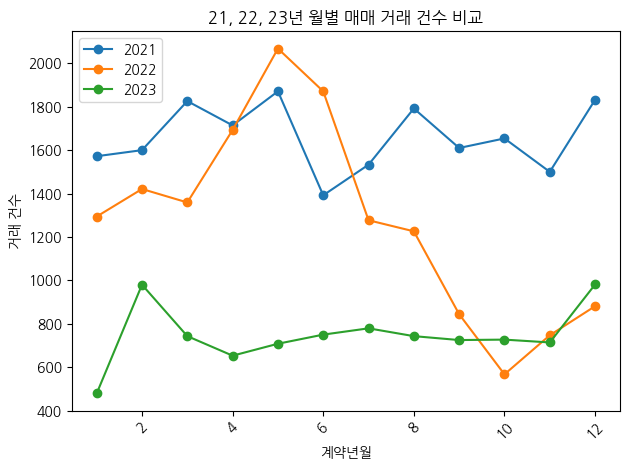

In [81]:
# 21, 22, 23년 월별 거래 건수 계산
counts_21 = officetel21_deal['계약년월'].dt.month.value_counts().sort_index()
counts_22 = officetel22_deal['계약년월'].dt.month.value_counts().sort_index()
counts_23 = officetel23_deal['계약년월'].dt.month.value_counts().sort_index()


df_counts = pd.DataFrame({
    '2021': counts_21,
    '2022': counts_22,
    '2023': counts_23,
})

ax = df_counts.plot(marker='o')
ax.set_xlabel('계약년월')
ax.set_ylabel('거래 건수')
ax.set_title('21, 22, 23년 월별 매매 거래 건수 비교')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
df_counts

,2021,2022,2023
1,1572,1294,479
2,1600,1421,980
3,1826,1359,743
4,1714,1693,653
5,1871,2068,708
6,1392,1871,750
7,1533,1277,779
8,1792,1226,743
9,1610,844,725
10,1654,567,727


### 거래 유형별 비율

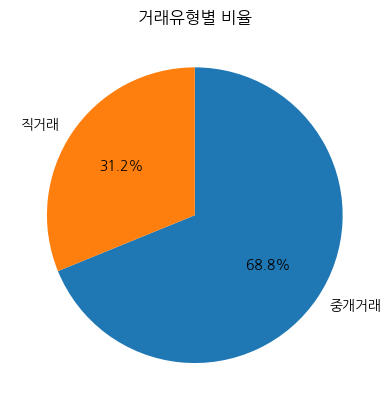

In [8]:
counts = officetel21_deal['거래유형'].value_counts()

# 파이 차트 그리기 (비율 표시 추가)
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.ylabel('')  # y축 라벨 제거
plt.title('거래유형별 비율')
plt.show()

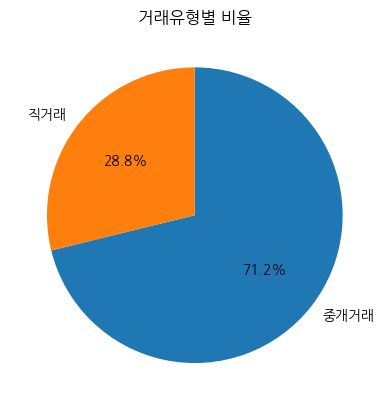

In [12]:
counts = officetel22_deal['거래유형'].value_counts()

# 파이 차트 그리기 (비율 표시 추가)
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.ylabel('')  # y축 라벨 제거
plt.title('거래유형별 비율')
plt.show()

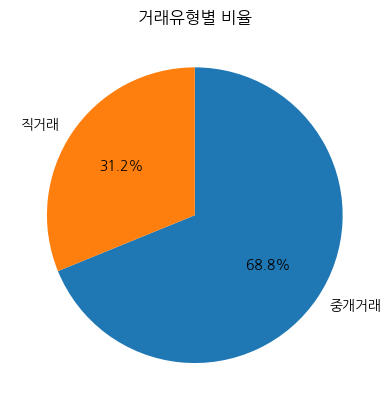

In [15]:
counts = officetel23_deal['거래유형'].value_counts()

# 파이 차트 그리기 (비율 표시 추가)
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)
plt.ylabel('')  # y축 라벨 제거
plt.title('거래유형별 비율')
plt.show()